# Machine Learning - a very basic introduction

#### An over simplified 'in-a-nutshell' of how it works, sort of -- Geoff French

In this notebook we show how samples are positioned in N-dimensional space. Dividing this space into regions allows us to classify (guess the type) of novel, as-of-yet unseen samples.

In this example we are going to train a classifier on Fisher's Iris Dataset and plot its decision surface.

First, some imports:

In [13]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

### Load the data

The feature vectors for each sample can be found in the `data` attribute and the ground truth classes (of which there are 3) can be found in the `target` attribute.

In [8]:
# Load
iris = load_iris()

# Get features and ground truth
X = iris.data
Y = iris.target

# Extract sepal length and petal width features (0 and 3)
X03 = np.append(X[:,0:1], X[:,3:4], axis=1)

### Scatter plot of data

First, lets produce a scatter plot of sepal length and petal width, with the colour of the points indicating ground truth class:

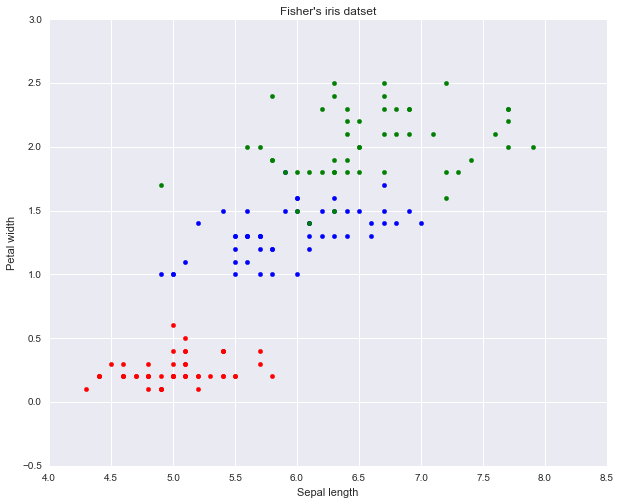

In [16]:
# Figure
plt.figure(figsize=(10,8))

# Scatter plot of the data points
plt.scatter(X[Y==0,0], X[Y==0,3], color='red')
plt.scatter(X[Y==1,0], X[Y==1,3], color='blue')
plt.scatter(X[Y==2,0], X[Y==2,3], color='green')

# Labels
plt.title('Fisher\'s iris datset')
plt.xlabel('Sepal length')
plt.ylabel('Petal width')

# Show
plt.show()

### Train a classifier

If we were given measurements of a flower of unknown species, how could we predict its species from its measurements?

We would need to divide the space seen in the plot above into regions in which a flower is most likely to be member of that species.

The classifiers in Scikit-learn do just this; they compute parameters to control the way in which an algorithm divides the space up into regions.

#### Define classifier plotting helper function

This function plots the data points in the data set in addition to plotting the decision surface that shows the regions of space that the classifier will assign to the 3 classes.

In [18]:
def clf_decision_surface_plot(clf):
    # Generate the co-ordinates at which we will ask the classifier to predict
    # the probabilities of the classes
    xx, yy = np.meshgrid(np.arange(4.0, 8.5, 0.01),
                         np.arange(-0.5, 3.0, 0.01))

    # Predict classes for all grid points
    Y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # New figure
    plt.figure(figsize=(10,8))

    # Plot the contours of the boundaries corresponding to each class
    plt.contourf(xx, yy, (Y_pred == 0).reshape(xx.shape), 1, cmap='OrRd', alpha=.4)
    plt.contourf(xx, yy, (Y_pred == 1).reshape(xx.shape), 1, cmap='Blues', alpha=.4)
    plt.contourf(xx, yy, (Y_pred == 2).reshape(xx.shape), 1, cmap='Greens', alpha=.4)

    # Plot the data points
    plt.scatter(X[Y==0,0], X[Y==0,3], color='red')
    plt.scatter(X[Y==1,0], X[Y==1,3], color='blue')
    plt.scatter(X[Y==2,0], X[Y==2,3], color='green')

    # Labels
    plt.title('Fisher\'s iris datset')
    plt.xlabel('Sepal length')
    plt.ylabel('Petal width')

    # Show
    plt.show()

#### Nearest neighbour classifier

In this case, we're going to train a nearest neighbours classifier on the dataset, only using the sepal length and petal width features:

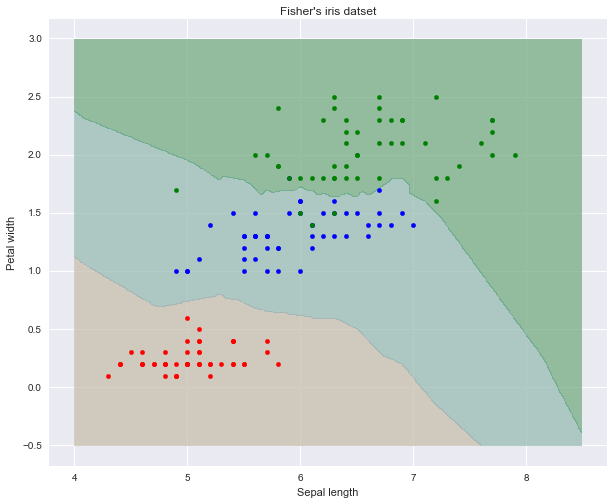

In [19]:
# Build a nearest neighbours classifier that uses the 3 nearest neighbours to make a decision
nn_clf = KNeighborsClassifier(3)
# Train on the dataset
nn_clf.fit(X03, Y)
# Plot the decision surface
clf_decision_surface_plot(nn_clf)

The decision surface of the nearest neighbors classifier is quite complex and attempts to follow the points in the dataset.

#### Linear support vector classifier

Now, lets try a linear support vector classifier:

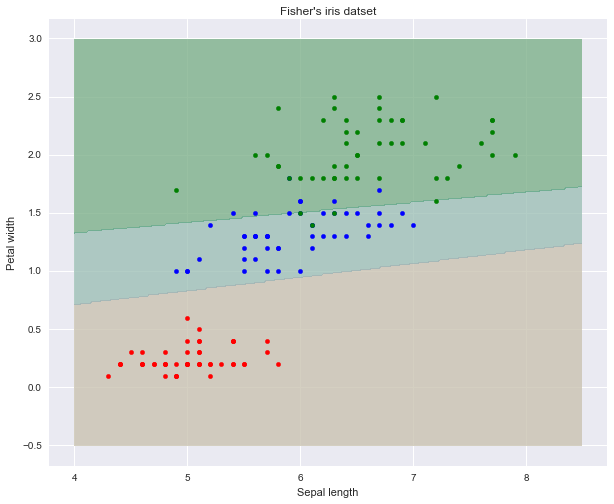

In [25]:
# Linear classifier
lclf = LinearSVC()
# Train
lclf.fit(X03, Y)
# Plot the decision surface
clf_decision_surface_plot(lclf)

The linear support vector classifier finds simple lines to separate the data points

#### Random forest classifier

Now, lets try a random forest:

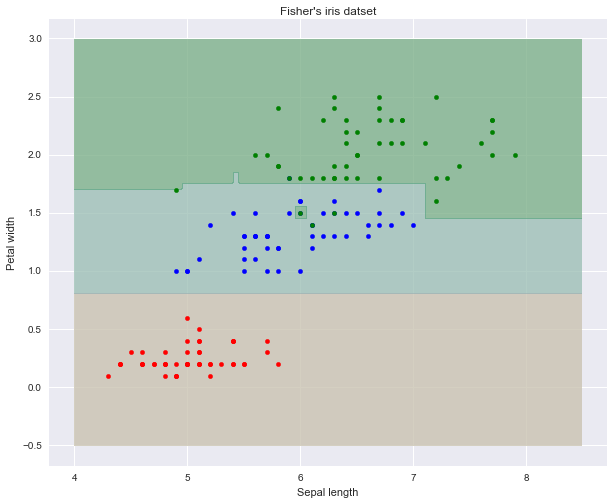

In [26]:
fclf = RandomForestClassifier()
fclf.fit(X03, Y)

clf_plot(fclf)

The random forest classifier is composed of decisions trees that split the space along lines that are aligned to the X and Y axes.